### Equipe: Davi Xie

### Projeto CMC-13

### 1 - Preparação dos dados

#### Pré-Processamento

In [318]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
# import r2_score
from sklearn.metrics import r2_score

In [319]:
df = pd.read_csv('./data/UK_real_estate.csv')
df

,Unnamed: 0.1,Unnamed: 0,Price,Location,Postal Code,Area,Bedrooms,Bathrooms,Receptions,City-County,House-Type
0,0,0,1675000,Wimbledon,SW19 8NY,2716,5,5,5,London,House
1,1,1,650000,Clerkenwell,EC1V 3PA,814,2,2,2,London,Flat / Apartment
2,2,2,735000,Putney,SW15 1QL,761,2,2,2,London,Flat / Apartment
3,3,3,1765000,Putney,SW15 1LP,1986,4,4,4,London,House
4,4,4,675000,Putney,SW15 1PL,700,2,2,2,London,Flat / Apartment
...,...,...,...,...,...,...,...,...,...,...,...
2953,2953,2953,2250000,NaN,W4 3UR,2469,4,4,4,London,House
2954,2954,2954,3950000,St. John's Wood,NW8 9UG,2803,5,5,5,London,House
2955,2955,2955,1750000,NaN,SE17 2JX,2396,5,5,5,London,House
2956,2956,2956,1195000,Marylebone,W1U 5BR,678,1,1,1,London,Flat / Apartment


Podemos ver inicialmente que as duas primeiras colunas são uma repetição e indicam o Id da linha. Vamos verificar se isso realmente acontece:

In [320]:
count = (df.iloc[:, 0] == df.iloc[:, 1]).value_counts()[True]
print("O tamanho do dataset é: ", len(df))
print("A quantidade de ocorrências disso é: ", count)

O tamanho do dataset é:  2958
A quantidade de ocorrências disso é:  2958


Assim, eliminando as duas primeiras colunas, temos:

In [321]:
df = df.drop(df.columns[:2], axis=1)
df

,Price,Location,Postal Code,Area,Bedrooms,Bathrooms,Receptions,City-County,House-Type
0,1675000,Wimbledon,SW19 8NY,2716,5,5,5,London,House
1,650000,Clerkenwell,EC1V 3PA,814,2,2,2,London,Flat / Apartment
2,735000,Putney,SW15 1QL,761,2,2,2,London,Flat / Apartment
3,1765000,Putney,SW15 1LP,1986,4,4,4,London,House
4,675000,Putney,SW15 1PL,700,2,2,2,London,Flat / Apartment
...,...,...,...,...,...,...,...,...,...
2953,2250000,NaN,W4 3UR,2469,4,4,4,London,House
2954,3950000,St. John's Wood,NW8 9UG,2803,5,5,5,London,House
2955,1750000,NaN,SE17 2JX,2396,5,5,5,London,House
2956,1195000,Marylebone,W1U 5BR,678,1,1,1,London,Flat / Apartment


#### Tratar Dados Faltantes

In [322]:
missing_values = pd.DataFrame(data={
    'Feature_name': df.columns,
    'missing_values': df.isnull().sum(),
    'percentage': df.isnull().sum() / len(df) * 100,
    'type': df.dtypes,
})
missing_values.sort_values(by='percentage', ascending=False).head(20)

,Feature_name,missing_values,percentage,type
Location,Location,862,29.141312,object
Price,Price,0,0.000000,int64
Postal Code,Postal Code,0,0.000000,object
Area,Area,0,0.000000,int64
Bedrooms,Bedrooms,0,0.000000,int64
Bathrooms,Bathrooms,0,0.000000,int64
Receptions,Receptions,0,0.000000,int64
City-County,City-County,0,0.000000,object
House-Type,House-Type,0,0.000000,object


Vislumbrando a coluna Location com suas ocorrências, temos:

In [323]:
location_values = df["Location"].value_counts()
location_values

Putney                    85
Wimbledon                 65
Barnes                    65
Wandsworth                60
Esher                     54
                          ..
94 Wapping High Street     1
11 Park Street             1
City Of London             1
 Fulham High Street        1
Campden Hill Road          1
Name: Location, Length: 573, dtype: int64

Por existir uma quantidade pequena de valores nulos, apenas 30%, podemos atribuir todos os valores nulos para uma variável 'Other'

In [324]:
df = df.dropna(subset=["Location"])
df

,Price,Location,Postal Code,Area,Bedrooms,Bathrooms,Receptions,City-County,House-Type
0,1675000,Wimbledon,SW19 8NY,2716,5,5,5,London,House
1,650000,Clerkenwell,EC1V 3PA,814,2,2,2,London,Flat / Apartment
2,735000,Putney,SW15 1QL,761,2,2,2,London,Flat / Apartment
3,1765000,Putney,SW15 1LP,1986,4,4,4,London,House
4,675000,Putney,SW15 1PL,700,2,2,2,London,Flat / Apartment
...,...,...,...,...,...,...,...,...,...
2948,450000,Camden,NW1 7HB,500,1,1,1,London,Flat / Apartment
2951,850000,Clerkenwell,EC1R 4UL,848,2,2,2,London,Flat / Apartment
2954,3950000,St. John's Wood,NW8 9UG,2803,5,5,5,London,House
2956,1195000,Marylebone,W1U 5BR,678,1,1,1,London,Flat / Apartment


#### Atributos redundantes

Se algum dos atributos tiver valor único, então poderemos remover eles do modelo pois eles não possuem nenhum poder preditivo no estudo.

In [325]:
unique_values = pd.DataFrame(data={"Column_Name": df.columns, "unique_values": df.nunique()})
unique_values.sort_values(by="unique_values", ascending=True)

,Column_Name,unique_values
House-Type,House-Type,8
Bedrooms,Bedrooms,11
Bathrooms,Bathrooms,11
Receptions,Receptions,11
City-County,City-County,31
Price,Price,427
Location,Location,573
Area,Area,1462
Postal Code,Postal Code,1797


Não há nenhuma coluna com valor único, portanto não precisamos retirar nenhuma coluna.

#### Análise Exploratória

Aqui iremos realizar a etapa inicila de análise de dados para obter uma compreensão melhor das informações que temos.

#### Análise Exploratória para Dados Quantitativos

Iniciando para os dados quantitativos, temos:

In [326]:
quantitatives_columns = ["Area", "Bedrooms", "Bathrooms", "Receptions"]

quantitatives_continuos = []
quantitatives_discreet = []
for column in df[quantitatives_columns].columns:
    unique_values = df[quantitatives_columns][column].nunique()
    print("Coluna ", column, " possui ", unique_values, " valores diferentes")
    if unique_values <= 15:
        quantitatives_discreet.append(column)
    else:
        quantitatives_continuos.append(column)
print("\nVariáveis quantitativas discretas: ", quantitatives_discreet)
print("Variáveis quantitativas contínuas: ", quantitatives_continuos)

Coluna  Area  possui  1462  valores diferentes
Coluna  Bedrooms  possui  11  valores diferentes
Coluna  Bathrooms  possui  11  valores diferentes
Coluna  Receptions  possui  11  valores diferentes

Variáveis quantitativas discretas:  ['Bedrooms', 'Bathrooms', 'Receptions']
Variáveis quantitativas contínuas:  ['Area']


Calculando algumas medidas de estatísticas, como média, mediana, moda, desvio padrão, mínimo, máximo e quartis da única variável contínua Area, temos:

In [327]:
summary = df[quantitatives_continuos].describe().transpose()
summary["Moda"] = df[quantitatives_continuos].mode().transpose()[0]
columns = ['Média', 'Mediana', 'Moda', 'Desvio Padrão', 'Mínimo', '25%', '50%', '75%', 'Máximo']
summary = summary.rename(columns = {
    'count': 'Quantidade',
    'mean': 'Média',
    'std': 'Desvio Padrão',
    'min': 'Mínimo',
    'max': 'Máximo'
})
summary

,Quantidade,Média,Desvio Padrão,Mínimo,25%,50%,75%,Máximo,Moda
Area,2096.0,1697.435592,1356.935007,274.0,817.75,1275.0,2149.25,12546.0,848


Podemos perceber que a média é maior que a mediana, ou seja, a distirbuição dos dados está inclina para a direita, ou melhor, existem valores mais altos que puxam a média para cima. Dessa forma, o gráfico da distirbuição possui uma cauda longa à direita com valores muito altos, enquanto a maioria dos valores está concentrada em uma faixa mais baixa.

#### Análise Exploratória para Dados Qualitativos

In [328]:
qualitatives_columns = ["Location", "Postal Code", "City-County", "House-Type"]

- Location

Olhando para a variável Location, temos:

In [329]:
location_values = df["Location"].value_counts()
location_values

Putney                    85
Wimbledon                 65
Barnes                    65
Wandsworth                60
Esher                     54
                          ..
94 Wapping High Street     1
11 Park Street             1
City Of London             1
 Fulham High Street        1
Campden Hill Road          1
Name: Location, Length: 573, dtype: int64

In [330]:
aux = df[df["Location"] == "Thames Ditton"]
aux

,Price,Location,Postal Code,Area,Bedrooms,Bathrooms,Receptions,City-County,House-Type
75,1050000,Thames Ditton,KT7 0HQ,1693,4,4,4,Surrey,House
271,825000,Thames Ditton,KT7 0DJ,2094,4,4,4,Surrey,House
363,750000,Thames Ditton,KT7 0QX,1510,3,3,3,Surrey,House
961,1325000,Thames Ditton,KT7 0QP,2410,5,5,5,Surrey,House
1109,1095000,Thames Ditton,KT7 0DN,2442,5,5,5,Surrey,House
1673,1600000,Thames Ditton,KT7 0LB,2609,5,5,5,Surrey,House
1739,1195000,Thames Ditton,KT7 0UH,1953,5,5,5,Surrey,House
1740,1595000,Thames Ditton,KT7 0RN,3110,4,4,4,Surrey,House
2002,900000,Thames Ditton,KT7 0PY,1363,4,4,4,Surrey,House
2608,1000000,Thames Ditton,KT7 0UG,1714,5,5,5,Surrey,House


In [331]:
location_single_values = len(location_values[location_values == 1])
print("Valores unitários de Location: ", location_single_values, " equivalente a ", "{:.2%}".format(location_single_values/len(df)))

Valores unitários de Location:  381  equivalente a  18.18%


Como há 13% de valores unitários em Location, seria possível trocar todas essas ocorrências por um valor único de Other, porém iríamos ter a maioria dos valores com Other, o que prejudicaria o modelo, por isso, nesse caso, iremos apenas deixar os valores unitários.

- Postal Code

Olhando para a variável Postal Code, temos:

In [332]:
postal_code_values = df["Postal Code"].value_counts()
postal_code_values

SW6 3LF     13
SW15 2BS     8
EC3R 6EA     7
N7 0JN       6
N7 6RG       6
            ..
E16 2ER      1
KT5 8NJ      1
KT10 8EQ     1
SW6 3PT      1
SW18 3NY     1
Name: Postal Code, Length: 1797, dtype: int64

In [333]:
postal_code_single_values = len(postal_code_values[postal_code_values == 1])
print("Valores unitários de Postal Code: ", postal_code_single_values, " equivalendo a ", "{:.2%}".format(postal_code_single_values/len(postal_code_values)))
print("Diferentes valores de Postal Code: ", len(postal_code_values), " equivalendo a ", "{:.2%}".format(len(postal_code_values)/len(df)))

Valores unitários de Postal Code:  1603  equivalendo a  89.20%
Diferentes valores de Postal Code:  1797  equivalendo a  85.73%


Pelo fato dessa variável conter pouca informação repetida e, portanto, relevante para a nossa predição de modelos, uma vez que há menos do que 16% de valores repetidos. Dos valores unitários de Postal Code, 87% deles aparece apenas uma vez na base de dados. Assim esse atributo não se torna útil para o nosso projeto, podendo ser retirado do modelo.

In [334]:
df = df.drop("Postal Code", axis=1)
df

,Price,Location,Area,Bedrooms,Bathrooms,Receptions,City-County,House-Type
0,1675000,Wimbledon,2716,5,5,5,London,House
1,650000,Clerkenwell,814,2,2,2,London,Flat / Apartment
2,735000,Putney,761,2,2,2,London,Flat / Apartment
3,1765000,Putney,1986,4,4,4,London,House
4,675000,Putney,700,2,2,2,London,Flat / Apartment
...,...,...,...,...,...,...,...,...
2948,450000,Camden,500,1,1,1,London,Flat / Apartment
2951,850000,Clerkenwell,848,2,2,2,London,Flat / Apartment
2954,3950000,St. John's Wood,2803,5,5,5,London,House
2956,1195000,Marylebone,678,1,1,1,London,Flat / Apartment


- City-County

Olhando para a variável City-County, temos:

In [335]:
city_county_values = df["City-County"].value_counts()
city_county_values

London                1699
Surrey                 235
Middlesex               65
Essex                   50
Hertfordshire            8
N7 6QX                   6
Fulham                   5
Twickenham               2
E5 8DE                   2
Wandsworth               2
Watford                  2
London1500               1
Marylebone               1
Kent                     1
Bushey                   1
Fitzrovia                1
Kensington               1
Middx                    1
Romford                  1
Chelsea                  1
Chessington              1
27 Carlton Drive         1
Fulham High Street       1
Little Venice            1
City Of London           1
Richmond                 1
Deptford                 1
Clerkenwell              1
Downs Road               1
Clapton                  1
Queens Park              1
Name: City-County, dtype: int64

In [336]:
city_county_single_values = len(city_county_values[city_county_values == 1])
print("Valores unitários de City: ", city_county_single_values, " equivalente a ", "{:.2%}".format(city_county_single_values/len(df)))

Valores unitários de City:  20  equivalente a  0.95%


Da mesma forma para Location, podemos substituir esse pequeno conjunto de menos de 1% de ocorrências para um valor de "Other". Nesse caso é uma porcentagem baixa comparado aos outros valores, ou seja, não prejudicaria tanto o modelo.

In [337]:
list_city_county = city_county_values[city_county_values == 1].index
list_city_county = list(list_city_county)

df["City-County"] = df["City-County"].replace(list_city_county, "Other")
city_county_values_treated = df["City-County"].value_counts()
city_county_values_treated

London           1699
Surrey            235
Middlesex          65
Essex              50
Other              20
Hertfordshire       8
N7 6QX              6
Fulham              5
E5 8DE              2
Wandsworth          2
Twickenham          2
Watford             2
Name: City-County, dtype: int64

- House Type

Olhando para a variável House Type, temos:

In [338]:
city_county_values = df["House-Type"].value_counts()
city_county_values

Flat / Apartment    925
House               866
New development     224
Penthouse            59
Bungalow              9
Studio                7
Duplex                4
Mews                  2
Name: House-Type, dtype: int64

#### Aplicação do One Hot Encoding

Aplicaremos, após a separação dos conjuntos de testes e de treinos, o one hot encoding para os atributos necessários.

In [339]:
columns_to_apply_one_hot_encoding = ["Location", "City-County", "House-Type", "Bedrooms", "Bathrooms", "Receptions"]

one_hot_encoded = pd.get_dummies(df, columns=columns_to_apply_one_hot_encoding)
one_hot_encoded

,Price,Area,Location_ 35 Salusbury Road,Location_ 352 Queenstown Road,Location_ 372 Queenstown Road,Location_ 50 Shad Thames,Location_ Acton,Location_ Aldgate,Location_ Barnes,Location_ Barons Court,...,Receptions_1,Receptions_2,Receptions_3,Receptions_4,Receptions_5,Receptions_6,Receptions_7,Receptions_8,Receptions_9,Receptions_10
0,1675000,2716,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,650000,814,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,735000,761,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1765000,1986,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,675000,700,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,450000,500,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2951,850000,848,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2954,3950000,2803,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2956,1195000,678,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [340]:
df_encoded = one_hot_encoded
df_encoded

,Price,Area,Location_ 35 Salusbury Road,Location_ 352 Queenstown Road,Location_ 372 Queenstown Road,Location_ 50 Shad Thames,Location_ Acton,Location_ Aldgate,Location_ Barnes,Location_ Barons Court,...,Receptions_1,Receptions_2,Receptions_3,Receptions_4,Receptions_5,Receptions_6,Receptions_7,Receptions_8,Receptions_9,Receptions_10
0,1675000,2716,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,650000,814,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,735000,761,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1765000,1986,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,675000,700,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,450000,500,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2951,850000,848,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2954,3950000,2803,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2956,1195000,678,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Separação do conjunto de Treino e Teste

Aqui iremos separar o conjunto total em dois subconjuntos, um de treino e outro de teste

In [341]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['Price'], axis=1).copy()
Y = df_encoded['Price'] # here we need to remove unnacessary columns if exist

train_X, temp_X, train_Y, temp_Y = train_test_split(X, Y, test_size=0.3, random_state=42)
test_X, val_X, test_Y, val_Y = train_test_split(temp_X, temp_Y, test_size=0.1, random_state=42)

### 2 - Modelo baseado em Redes Neurais do tipo MLP (MultiLayer Perceptron)

Realizando um Grid Search para encontrar os melhores hiperparâmetros, encontramos que:

In [312]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(64, 32)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'max_iter': [10000],
    'random_state': [42],
}

grid_search = GridSearchCV(MLPRegressor(), param_grid, cv=5)
grid_search.fit(train_X, train_Y)

print(grid_search.best_params_)

C:\Users\Davi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Davi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Davi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Davi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn

{'activation': 'identity', 'hidden_layer_sizes': (64, 32), 'max_iter': 10000, 'random_state': 42, 'solver': 'lbfgs'}


In [348]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=10000, random_state=42)

MLP.fit(train_X, train_Y)
MLP_predicted = MLP.predict(test_X)
r2_score(test_Y, MLP_predicted)

0.44206148531393163

### 3 - Modelo baseado em Árvores de Decisão (DTR)

In [343]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(criterion='squared_error', max_depth=15, min_samples_split=5, min_samples_leaf=5)
DTR.fit(train_X, train_Y)

DTR_predicted = DTR.predict(test_X)
r2_score(test_Y, DTR_predicted)

0.4753806322772608

### 4 - Modelo baseado em Random Forest (RF)

In [344]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(train_X, train_Y)

RF_predicted = RF.predict(test_X)
r2_score(test_Y, RF_predicted)

0.5588283717770569

### 5 - Análise Comparativa do desempenho dos modelos.

Iremos usar as métricas de RMSE (Root Mean Squared Error), MAPE (Mean Absolute Percentage Error) e R2 (R2 Score). A métrica RMSE, comumente usada em problemas de regressão indica a raiz do erro médio quadrático. O MAPE indica o erro percentual do modelo e o R2 indica o quão bem a variável alvo pode ser explicada pelos atributos dado o modelo em questão.

In [349]:
from sklearn import metrics
def regression_metrics(y_pred, y_test,model_name): 
    
    rmse_ = np.sqrt(metrics.mean_squared_error(y_pred,y_test))
    r2 = metrics.r2_score(y_test, y_pred)
    mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
    print(model_name, "\n")
    print(" RMSE: ", rmse_)
    print("R2: " + str(r2))
    print("MAPE: " + str(mape))
    print("---------------")
    return rmse_, r2, mape

In [350]:
list_models_name = [
    "MLP",
    "DTR",
    "RF",
]
list_models = [MLP, DTR, RF]
list_models_predicted = [MLP_predicted, DTR_predicted, RF_predicted]
list_models_RMSE = []
list_models_R2 = []
list_models_MAPE = []
for i in range(0, len(list_models)):
    model_predicted = list_models_predicted[i]
    model_name = list_models_name[i]
    rmse, r2, mape = regression_metrics(model_predicted, test_Y,model_name)
    list_models_RMSE.append(rmse)
    list_models_R2.append(r2)
    list_models_MAPE.append(mape)

MLP 

 RMSE:  1062053.4525921806
R2: 0.44206148531393163
MAPE: 0.29557340584947583
---------------
DTR 

 RMSE:  1029853.2976828442
R2: 0.4753806322772608
MAPE: 0.32772730316153453
---------------
RF 

 RMSE:  944402.2035086394
R2: 0.5588283717770569
MAPE: 0.2908993676238233
---------------


Comparando os valores de MAPE para os três modelos, temos:

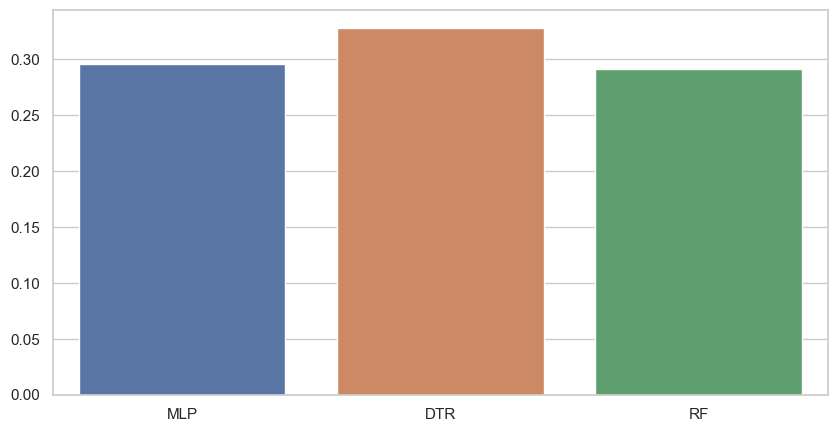

In [351]:
# comparando os modelos por MAPE:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list_models_name, y=list_models_MAPE)

Comparando os valores de RMSE para os três modelos, temos:

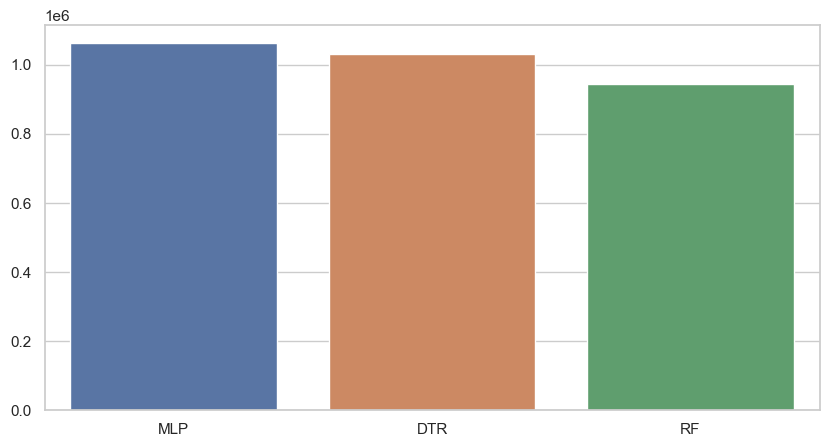

In [352]:
# comparando os modelos por RMSE:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list_models_name, y=list_models_RMSE)

Comparando os valores de RMSE para os três modelos, temos:

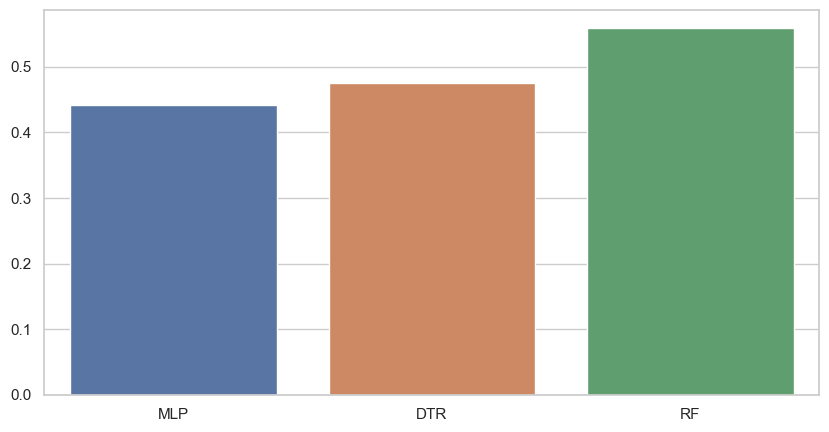

In [353]:
# comparando os modelos por R2:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list_models_name, y=list_models_R2)

### 6 - Aplicação da predição do Modelo Desenvolvido

Portanto, seguindo qualquer uma das métricas (RMSE, MAPE ou R2) o melhor modelo foi o Random Forest:

In [354]:
model_index = np.argmax(list_models_R2)
model = list_models[model_index]
model_name = list_models_name[model_index]
model_predicted = list_models_predicted[model_index]
print("\nModelo com melhor R2: " + model_name)
print("MAPE: " + str(list_models_MAPE[model_index]))
print("RMSE: " + str(list_models_RMSE[model_index]))
print("R2: " + str(list_models_R2[model_index]))


Modelo com melhor R2: RF
MAPE: 0.2908993676238233
RMSE: 944402.2035086394
R2: 0.5588283717770569


Aplicando a predição do modelo acima escolhido, temos:

In [355]:
predictions = model.predict(val_X)
predictions

array([ 895000,  550000, 1000000, 3500000,  875000, 1795000, 2350000,
       2400000, 1175000,  550000,  950000,  950000,  800000, 1100000,
       1375000, 1350000,  650000,  799000, 2595000, 1575000,  475000,
        550000,  799000, 2350000, 1345000,  699950, 2550000, 2950000,
       2650000, 2750000,  515000,  500000,  545000, 1995000, 3450000,
        550000, 2400000, 1325000,  390000, 1000000, 1050000, 1150000,
        699950, 2375000,  675000,  475000,  610000,  850000, 1995000,
        850000, 3250000,  495000,  900000,  650000,  475000, 7000000,
        375000,  650000,  710000, 1285000,  825000,  625000,  699950],
      dtype=int64)

Analisando a eficácia no dataste de validação, encontramos:

In [356]:
r2_score(val_Y, predictions)

0.5991026733070615

Aqui o modelo teve uma métrica (0.60) de R2 Score maior que nos testes (0.56), isso se dá pelo fato de serem datasets diferentes, de tamanhos diferentes e com dados diferentes, então a acurácia não será a mesma, mas deve ser próxima, que é o que ocorre no caso.

Agora iremos decodificar o dataset de validação e exportá-los em um csv.

In [357]:
# columns_to_apply_one_hot_encoding = ["Location", "City-County", "House-Type", "Bedrooms", "Bathrooms", "Receptions"]
area = val_X["Area"]
val_X_decoded = pd.DataFrame(area)
val_X_decoded["Price"] = predictions
val_X_encoded = val_X.drop("Area", axis=1)
for column in columns_to_apply_one_hot_encoding:
    val_X_decoded[column] = ''
    list_values_column = []
for index, row in val_X_encoded.iterrows():
    for col_name, value in row.items():
        if value == 1:
            column_name = col_name.split("_")[0]
            column_value = col_name.split("_")[1]
            val_X_decoded.at[index, column_name] = column_value
            
val_X_decoded.to_csv("data/UK_real_estate_test.csv", index=False)
val_X_decoded

,Area,Price,Location,City-County,House-Type,Bedrooms,Bathrooms,Receptions
547,635,895000,Fitzrovia,London,Flat / Apartment,1,1,1
1409,468,550000,Pimlico,London,Flat / Apartment,1,1,1
1916,1495,1000000,Southfields,London,House,4,4,4
21,3016,3500000,Marylebone,London,House,4,4,4
2417,747,875000,Clerkenwell,London,Flat / Apartment,2,2,2
...,...,...,...,...,...,...,...,...
1496,729,710000,Putney,London,Flat / Apartment,2,2,2
540,1993,1285000,Wandsworth,London,House,5,5,5
2328,693,825000,Fulham,London,Flat / Apartment,2,2,2
819,561,625000,Clerkenwell,London,Flat / Apartment,1,1,1


### 7 - Conclusões

O tema do trabalho foi um bom tema, pois é um problema clássico de aprendizado de máquina. Foi possível trabalhar todas as nuances do projeto, além disso, foi possível explorar por fora outros modelos não apresentados de Aprendizado de Máquina.